In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12,6)


In [5]:
import librosa
import os
BASE_DIR = r"C:\Users\emilk\data\GTZAN"

genres = os.listdir(BASE_DIR)
genres = [g for g in genres if os.path.isdir(os.path.join(BASE_DIR, g))]

print("Genres found:", genres)

audio_list = []
label_list = []
filename_list = []

for genre in genres:
    genre_dir = os.path.join(BASE_DIR, genre)

    for filename in os.listdir(genre_dir):
        if filename.endswith(".au"):
            filepath = os.path.join(genre_dir, filename)

            audio, sr = librosa.load(filepath, sr=22050)

            audio_list.append(audio)
            label_list.append(genre)
            filename_list.append(filename)

df = pd.DataFrame({
    "audio": audio_list,
    "genre": label_list,
    "filename": filename_list
})

print(df.head())
print("Total samples:", len(df))
print(df['genre'].value_counts())


class_names = sorted(df['genre'].unique())
print("Class names:", class_names)


Genres found: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'processed', 'raw', 'reggae', 'rock']
                                               audio  genre        filename
0  [0.0073242188, 0.016601562, 0.0076293945, -0.0...  blues  blues.00000.au
1  [0.0034179688, 0.0043029785, 0.001373291, 0.00...  blues  blues.00001.au
2  [0.019012451, 0.047698975, 0.029418945, -0.018...  blues  blues.00002.au
3  [-0.013000488, -0.03060913, -0.036071777, -0.0...  blues  blues.00003.au
4  [-0.0063171387, -0.009277344, -0.008331299, -0...  blues  blues.00004.au
Total samples: 1000
genre
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64
Class names: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


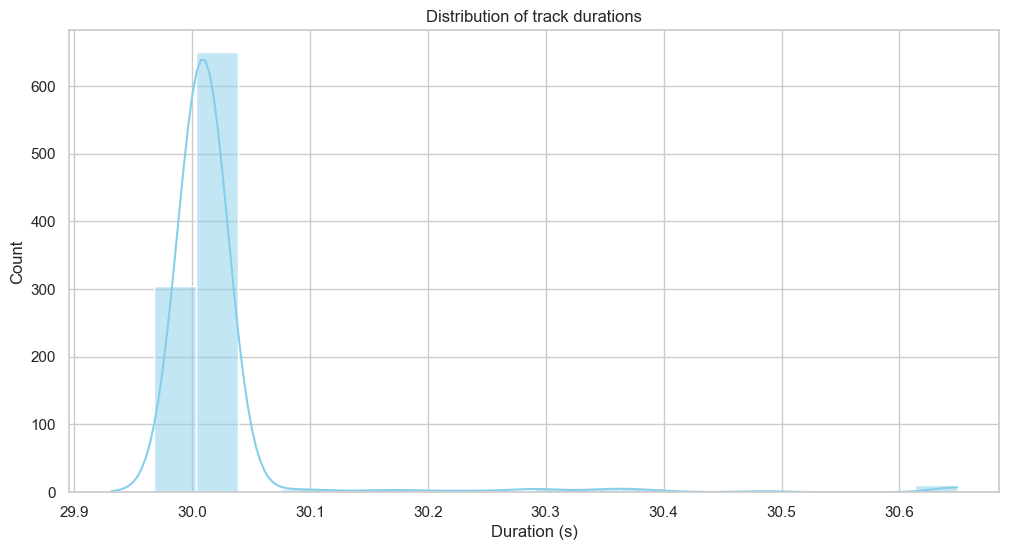

Mean duration: 30.024074648526074
Min duration: 29.931972789115648
Max duration: 30.648888888888887


In [6]:
durations = [librosa.get_duration(y=a, sr=22050) for a in df['audio']]
df['duration'] = durations

plt.figure()
sns.histplot(df['duration'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of track durations")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()

# Średnia i min/max długości
print("Mean duration:", np.mean(durations))
print("Min duration:", np.min(durations))
print("Max duration:", np.max(durations))


In [7]:
def extract_features_ext(audio, sr=22050):
    # MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    
    # Chroma
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)
    
    # RMS
    rms = librosa.feature.rms(y=audio)
    rms_mean = np.mean(rms)
    
    # Spectral Contrast
    spec_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    spec_contrast_mean = np.mean(spec_contrast, axis=1)
    
    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr_mean = np.mean(zcr)
    
    return np.concatenate([
        mfcc_mean, mfcc_std, 
        chroma_mean, chroma_std, 
        [rms_mean], 
        spec_contrast_mean, 
        [zcr_mean]
    ])

features_ext = np.array([extract_features_ext(a) for a in df['audio']])
print("Features shape:", features_ext.shape)


Features shape: (1000, 59)


C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


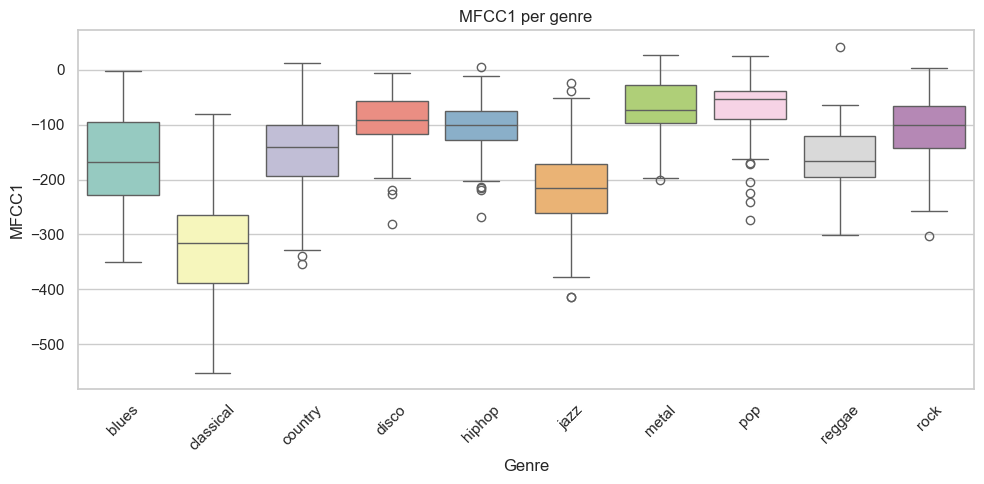

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


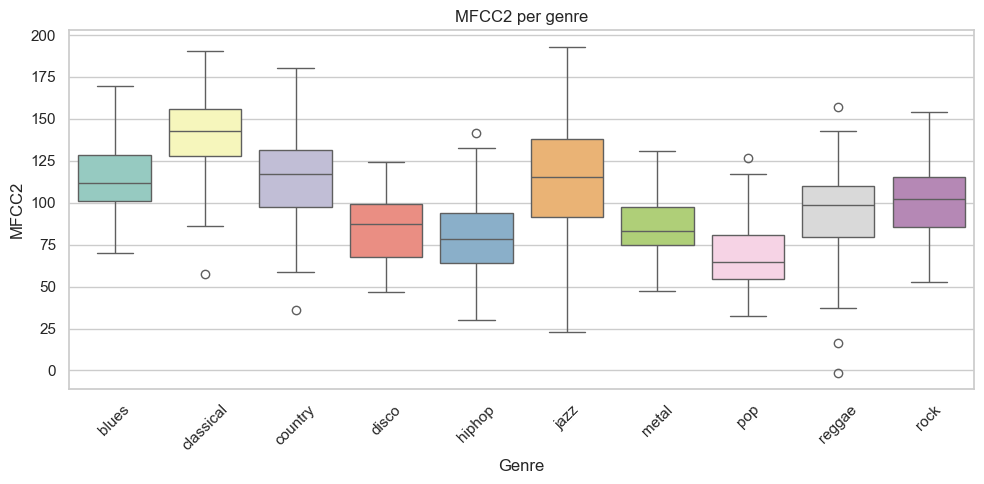

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


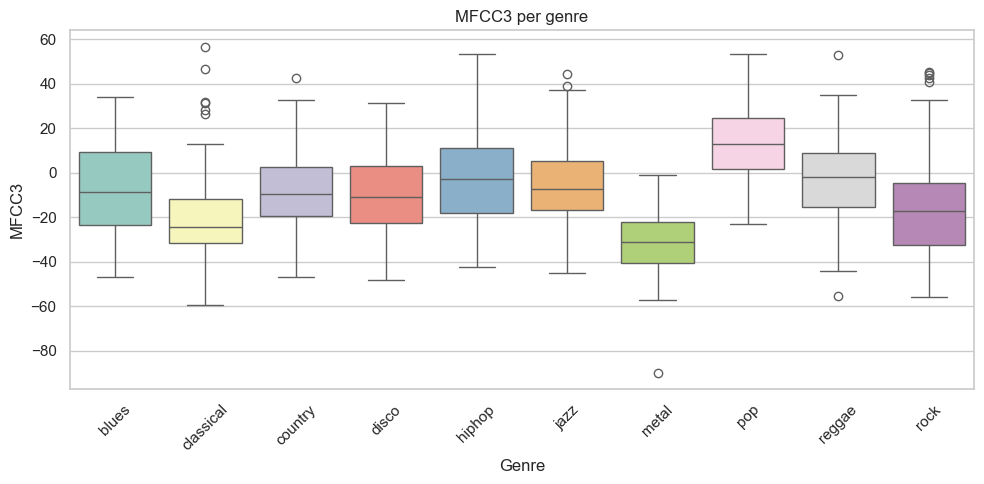

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


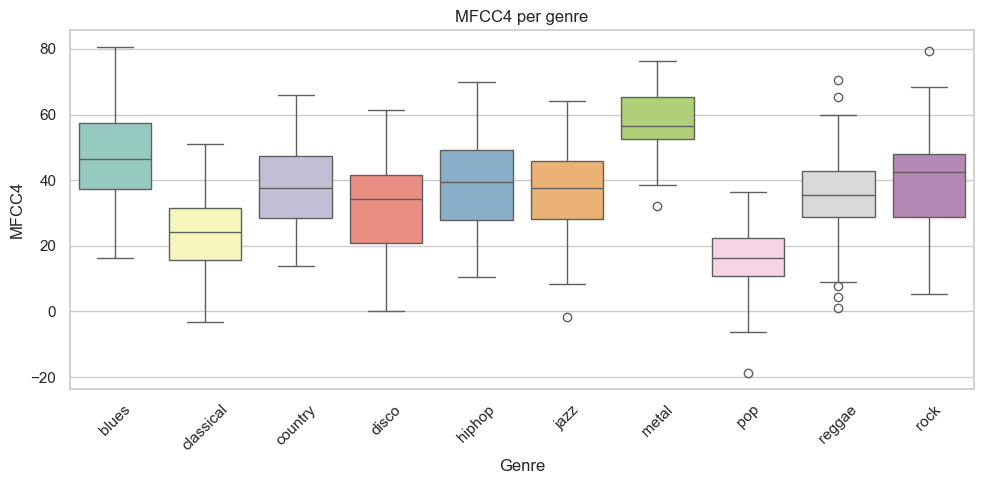

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


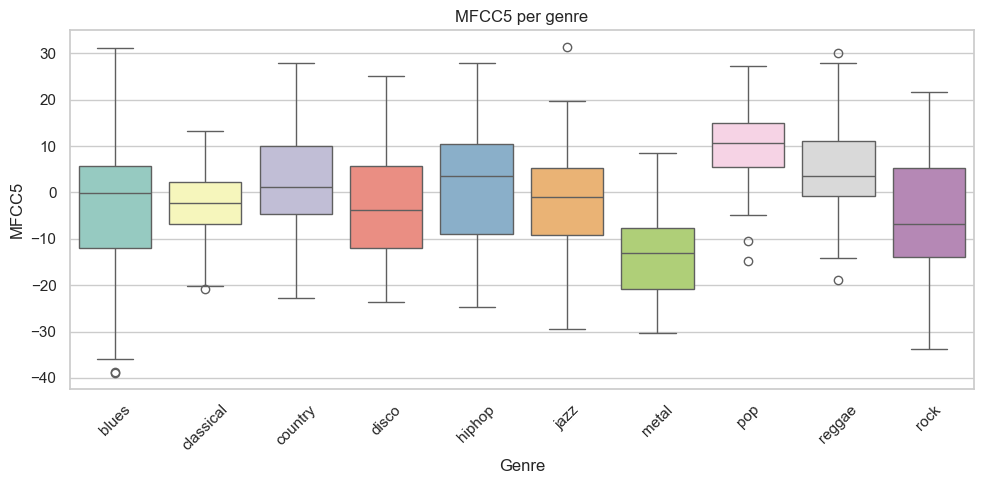

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


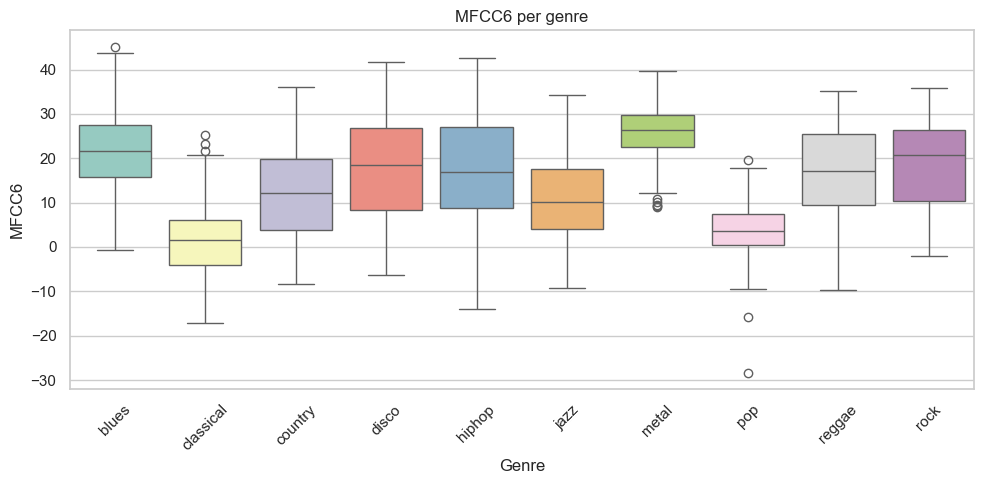

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


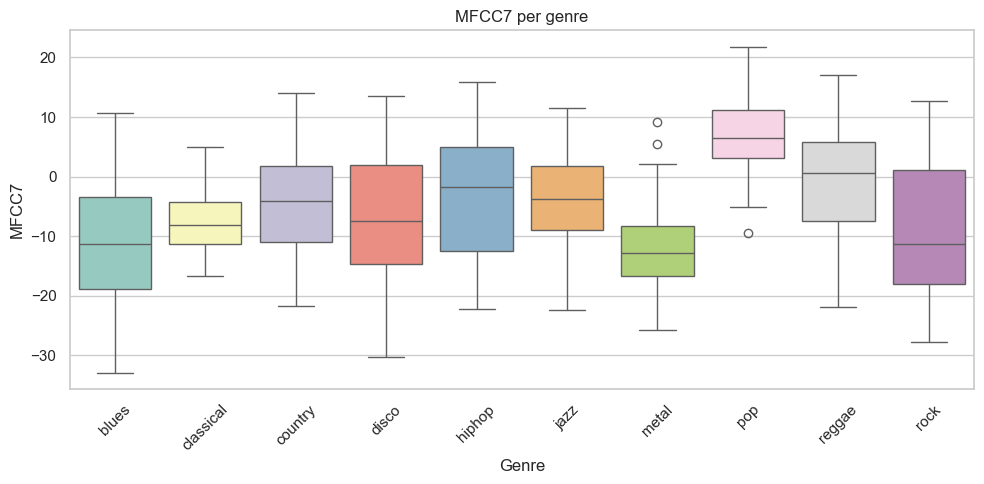

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


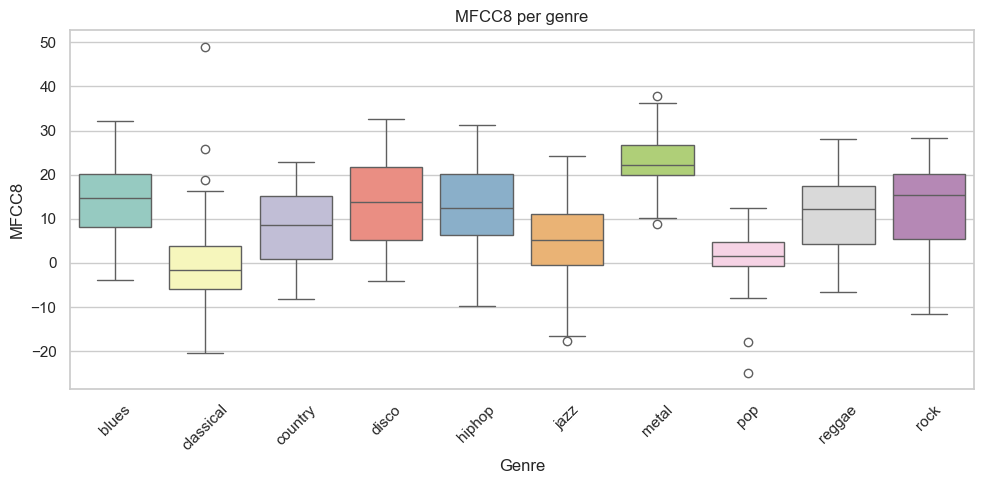

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


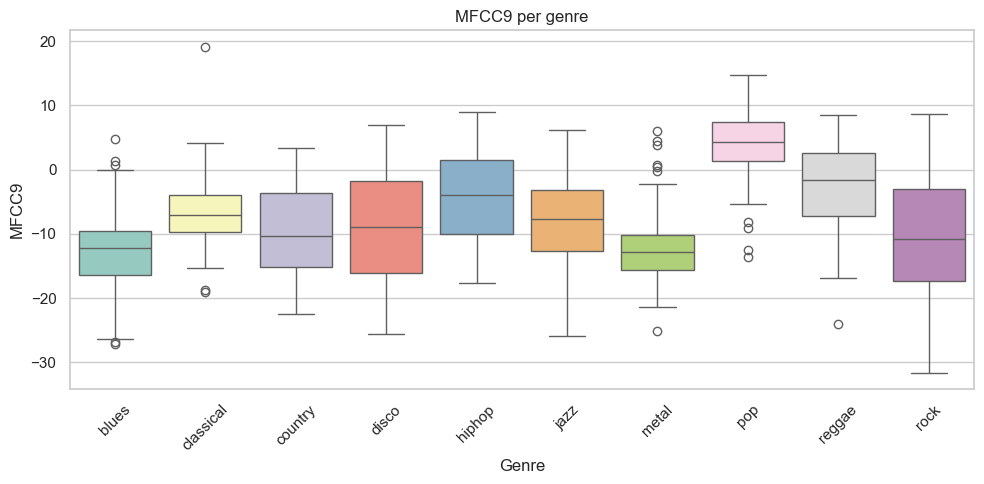

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


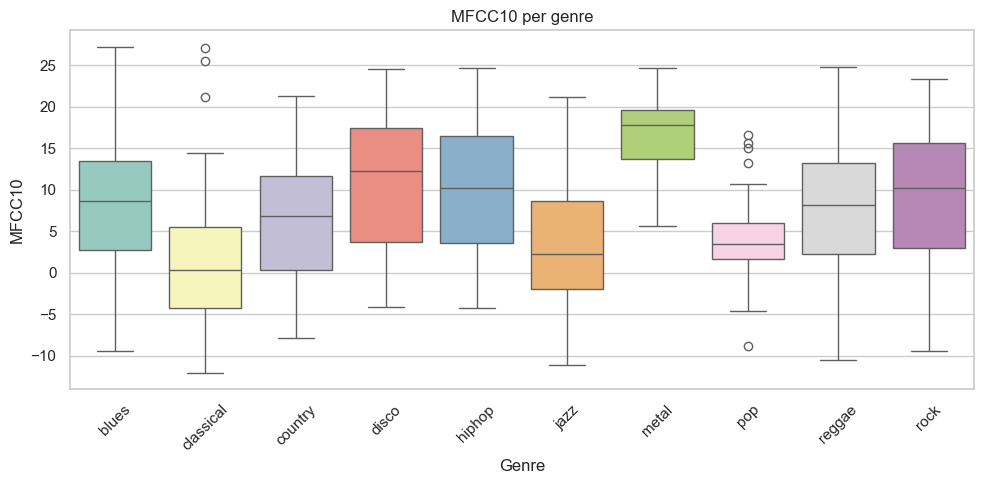

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


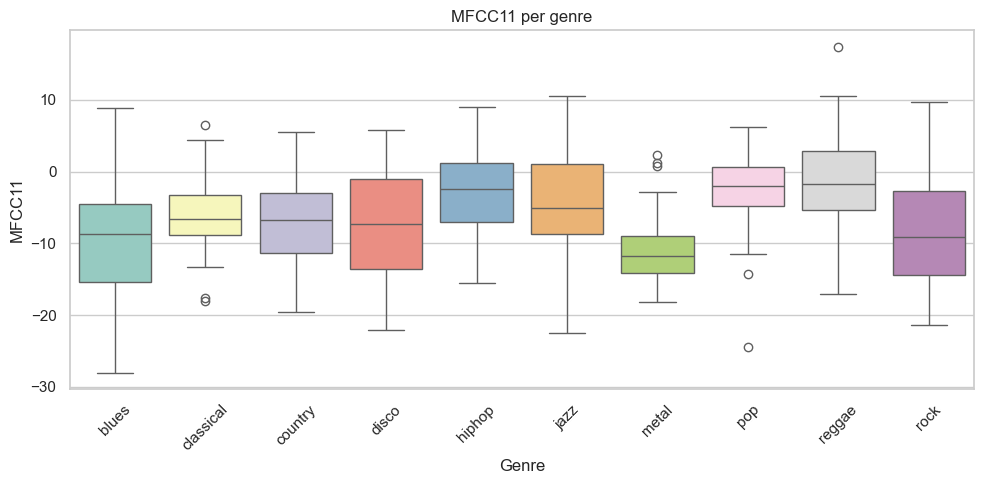

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


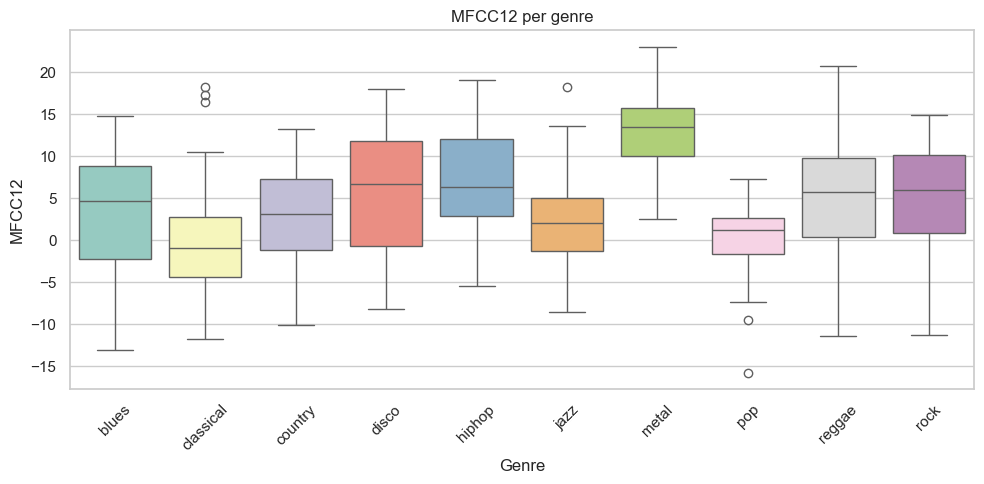

C:\Users\emilk\AppData\Local\Temp\ipykernel_23324\1214028593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


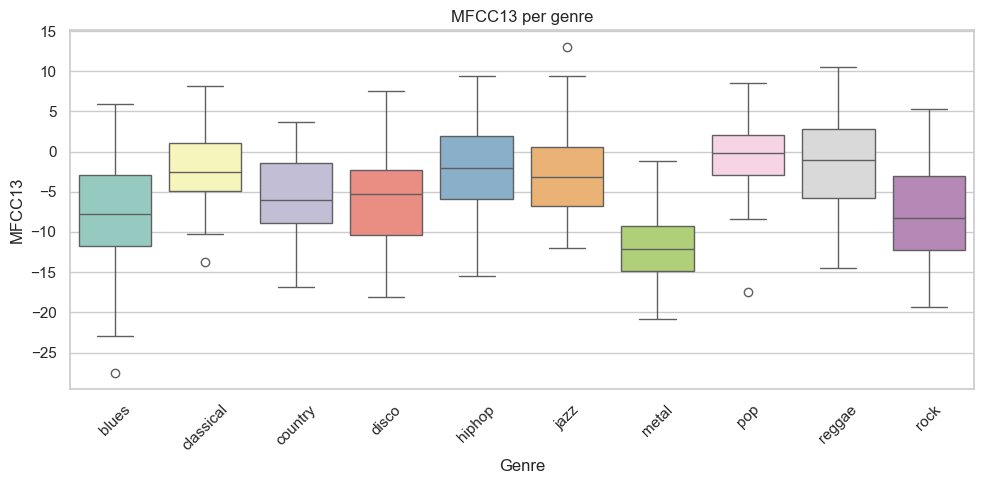

In [9]:
mfcc_cols = [f"MFCC{i+1}" for i in range(13)]
mfcc_df = pd.DataFrame(features_ext[:, :13], columns=mfcc_cols)
mfcc_df["genre"] = df["genre"]

for col in mfcc_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=mfcc_df,
        x="genre",
        y=col,
        palette="Set3"
    )
    plt.title(f"{col} per genre")
    plt.xlabel("Genre")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  



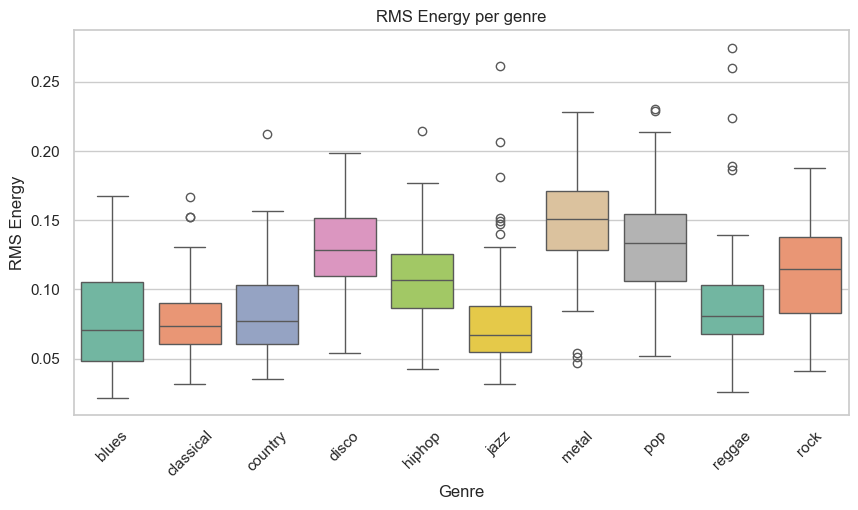

In [11]:

rms_df = pd.DataFrame({'rms': features_ext[:, -1], 'genre': df['genre']})

plt.figure(figsize=(10,5))
sns.boxplot(
    x='genre',
    y='rms',
    data=rms_df,
    hue='genre',
    dodge=False,
    legend=False,
    palette='Set2'
)
plt.title("RMS Energy per genre")
plt.xlabel("Genre")
plt.ylabel("RMS Energy")
plt.xticks(rotation=45)
plt.show()



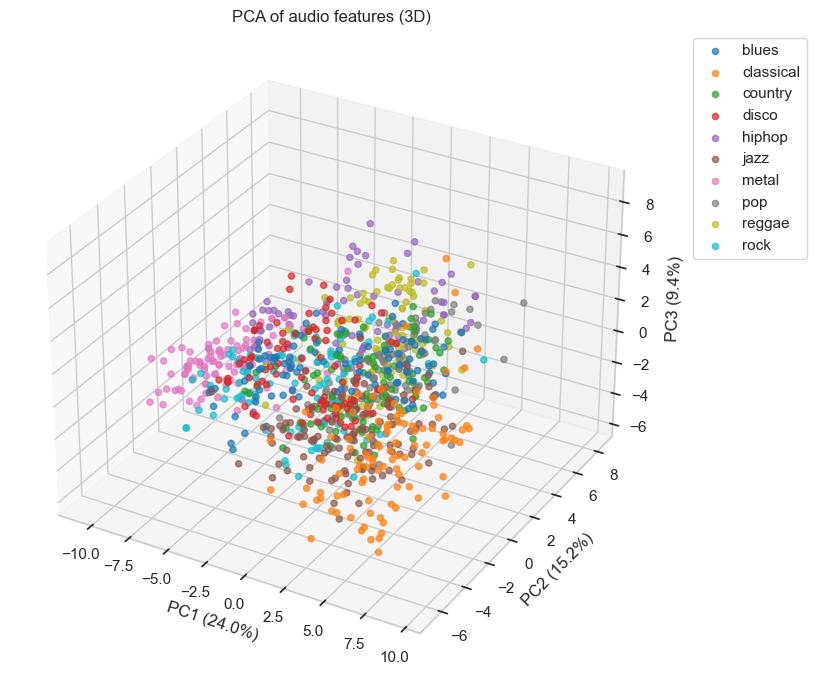

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_ext) 


pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)



fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection="3d")

colors = sns.color_palette("tab10", len(class_names))

for i, genre in enumerate(class_names):
    idx = df["genre"] == genre
    ax.scatter(
        X_pca_3d[idx, 0],
        X_pca_3d[idx, 1],
        X_pca_3d[idx, 2],
        label=genre,
        alpha=0.7,
        s=20,
        color=colors[i]
    )

ax.set_title("PCA of audio features (3D)")
ax.set_xlabel(f"PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})")
ax.set_ylabel(f"PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})")
ax.set_zlabel(f"PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


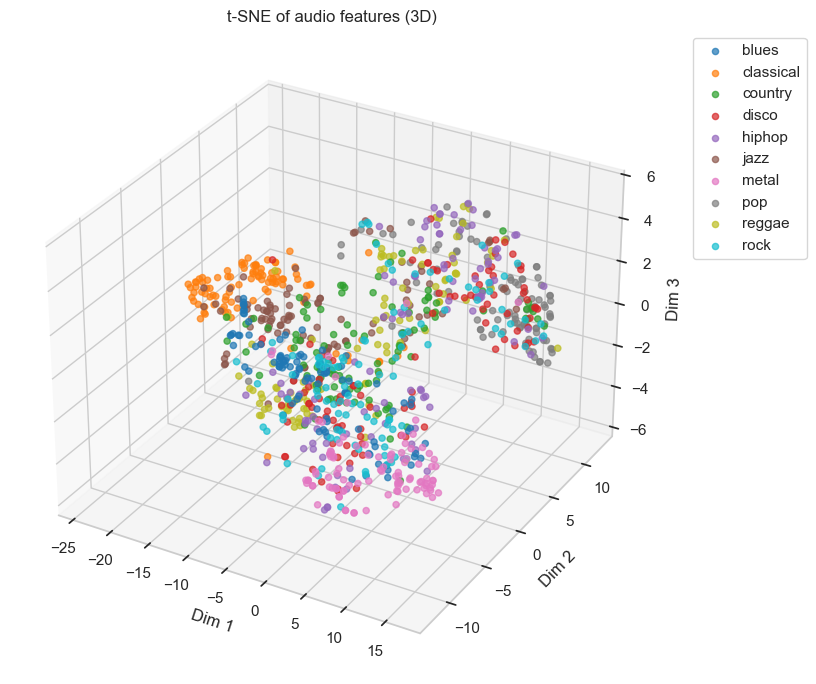

In [16]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import seaborn as sns


tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(features_ext)

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection="3d")

colors = sns.color_palette("tab10", len(class_names))

for i, genre in enumerate(class_names):
    idx = df["genre"] == genre
    ax.scatter(
        X_tsne_3d[idx, 0],
        X_tsne_3d[idx, 1],
        X_tsne_3d[idx, 2],
        label=genre,
        alpha=0.7,
        s=20,
        color=colors[i]
    )

ax.set_title("t-SNE of audio features (3D)")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
# ===============================
# 10️⃣ EDA Summary
# ===============================
"""
Podsumowanie EDA — GTZAN

Dane: 1000 nagrań, 10 gatunków, 100 utworów na gatunek.

Długość: ~30 s, SR=22050 Hz, spójne próbki.

RMS Energy:

Classical: niska, duża zmienność

Pop / Hip-hop: wysoka, stabilna 

Metal: wysoka, umiarkowany rozrzut 

MFCC: MFCC1 → energia, MFCC2-13 → barwa; Classical wyróżnia się najniższymi MFCC1.

Redukcja wymiarów (PCA / t-SNE):

Classical i Jazz → wyraźnie odseparowane 

Rock / Country / Disco → częściowe nakładanie 

Metal / Pop → zwarte, drobne nakładki

Wnioski:

Najłatwiejszy do klasyfikacji gatunek: Classical 

Najtrudniejsze do rozróżnienia: Rock vs Country vs Blues 

Zadanie umiarkowanie trudne, możliwa dokładność 60–80% na prostych modelach
"""
